## Import Library

In [1]:
import numpy as np
import pandas as pd
import swifter
import re
import string
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas_profiling
from pandas_profiling import ProfileReport

## Import Dataset

In [2]:
df = pd.read_json(r'/home/ubuntu/Downloads/alert_data.json')

## Exploratory Data Ananlysis

In [3]:
profile = ProfileReport(df)

In [4]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing

In [5]:
df.head()

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True


In [6]:
df.shape, df.size

((10000, 10), 100000)

In [7]:
df.columns

Index(['subject', 'currentState', 'repeatCount', 'priority', 'healTime',
       'alertClass', 'alertSubClass', 'alertCategory', 'alertSubCategory',
       'alert_autoheal'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subject           10000 non-null  object
 1   currentState      10000 non-null  object
 2   repeatCount       10000 non-null  int64 
 3   priority          10000 non-null  object
 4   healTime          10000 non-null  int64 
 5   alertClass        10000 non-null  object
 6   alertSubClass     10000 non-null  object
 7   alertCategory     10000 non-null  object
 8   alertSubCategory  10000 non-null  object
 9   alert_autoheal    10000 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 713.0+ KB


In [9]:
df.describe()

,repeatCount,healTime
count,10000.000000,10000.000000
mean,2.137800,1705.875400
std,0.535014,5683.926477
min,2.000000,1.000000
25%,2.000000,240.000000
50%,2.000000,540.000000
75%,2.000000,900.000000
max,10.000000,76320.000000


In [10]:
# Checking Null Value
df.isnull().mean()

subject             0.0
currentState        0.0
repeatCount         0.0
priority            0.0
healTime            0.0
alertClass          0.0
alertSubClass       0.0
alertCategory       0.0
alertSubCategory    0.0
alert_autoheal      0.0
dtype: float64

In [11]:
# Checking Duplicate Value

df[df.duplicated()]

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
17,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
18,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
20,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
22,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
29,CPU Usage is 100.0%.,Ok,2,P2,600,Compute,Operating System,Device Health,CPU,True
...,...,...,...,...,...,...,...,...,...,...
9993,Attenuated Alert: FORTINET-FORTIGATE-MIB::fgTr...,Ok,3,P1,480,Network,Wireless,Device Status,AP Down,True
9994,[Cleared] hcs-west-emc-storage-monitor: We are...,Ok,2,P2,18,Others,Others,Others,Others,True
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True


In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.head()

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True


In [14]:
df.drop(columns = ['currentState','subject'], inplace = True)

## Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality.( A categorical feature is said to possess high cardinality when there are too many of these unique values.) High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinalit

In [15]:
categorical = df.columns[df.dtypes == object]
# categorical = [var for var in df.columns if df[var].dtype=='O']

In [16]:
# check for cardinality in categorical variables

# df.priority.unique()

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')


priority  contains  4  labels
alertClass  contains  9  labels
alertSubClass  contains  21  labels
alertCategory  contains  10  labels
alertSubCategory  contains  69  labels


In [17]:
df.alertClass.value_counts()

Network          1671
Others           1575
Compute           962
Application       657
Environment       109
Data              105
Cloud              54
Communication      53
Tools              52
Name: alertClass, dtype: int64

In [18]:
pd.set_option("display.max_rows", None)

In [19]:
df.alertSubCategory.value_counts()

Others                                         1575
Device Down                                     652
Monitoring Failure                              310
CPU                                             252
Third Party Application Service                 243
Device Reboot                                   243
AP Down                                         241
Memory                                          192
Website Down                                    187
Interface Down                                  184
Opsramp Cloud Connectivity                      175
Webservice Performance                          128
Disk Utilization                                121
Temperature                                     119
Interface Utilization                            64
Packet Loss                                      55
ESX Health                                       52
LB Node Down                                     51
Veeam Service Stopped                            44
Service Down

In [20]:
df.alertSubCategory.nunique()

69

In [21]:
columns = ['Interface Utilization', 'Packet Loss', 'ESX Health', 'LB Node Down', 'Veeam Service Stopped', 'Service Down', 'Disk Performance',
'Microsoft Exchange Service Stopped', 'Application Performance', 'Hotfix/Patch/Firmware Update', 'SQL Service Stopped',
'S2S VPN Tunnel Status', 'Power Supply', 'Windows Service Stopped', 'UPS', 'Vmware Service Stopped', 'Routing', 'Fan Status',
'SQL Database Status', 'FRU Status', 'Informational', 'PDU', 'SQL Performance', 'Backup Exec Service Stopped', 'Backup Failure',
'MySQL Service Stopped', 'Airwatch Service Stopped', 'Azure Advanced Threat Protection Stopped', 'Citrix Service Stopped',
'Call Routing', 'CPU Utilization', 'Database Performance', 'AD Health', 'Application Down', 'Microsoft Azure AD Connect  Service Stopped',
'Storage Status', 'Hyper-V Service Stopped', 'Storage Utilization', 'AD Performance', 'Database Replication', 'Trunk Down',
'Backup Job Status', 'License Management', 'VoIP Server Down', 'Webservice Error', 'Application Errors', 'Storgepool Utilization',
'Storagecraft Service Stopped', 'Switching Loop', 'Battery Status', 'Management Connectivity', 'Resource Down', 'High Availability',
'Exchange - Mailflow', 'Opsramp Gateway Status']

In [22]:
index_pos1=[]
for i in columns:
    index = df[df["alertSubCategory"] == i].index.values.tolist()
    for j in index:
        index_pos1.append(j)

In [23]:
df.drop(index_pos1,inplace=True)

In [24]:
df.alertCategory.value_counts()

Others                1575
Device Status         1136
Device Health          654
Connectivity           485
Application Health     401
Application Status     187
Network Interface      184
Name: alertCategory, dtype: int64

In [25]:
index_pos2=[]
for i in ['Device Management', 'VOIP Link', 'Resource Status']:
    index = df[df["alertCategory"] == i].index.values.tolist()
    for j in index:
        index_pos2.append(j)

In [26]:
df.drop(index_pos2, inplace=True)

In [27]:
df.alertSubClass.value_counts()

Others                     1575
Operating System            694
Switch                      652
Wireless                    341
Web Service                 315
Firewall                    243
Third Party Application     243
Router                      208
Virtualization              116
Power                        94
Monitoring                   51
Voice                        32
Generic Device               29
SDWAN                        13
Storage                      10
Hardware                      6
Name: alertSubClass, dtype: int64

In [28]:
columns1 = ['Infra Application', 'Monitoring', 'Backup', 'Voice', 'Database', 'Generic Device', 'Storage', 'SDWAN', 'Hardware', 'Cloud Instance', 'Collaboration']

In [29]:
index_pos3=[]
for i in columns1:
    index = df[df["alertSubClass"] == i].index.values.tolist()
    for j in index:
        index_pos3.append(j)

In [30]:
df.drop(index_pos3, inplace=True)

In [31]:
df.repeatCount.unique()

array([ 2,  3,  4,  5,  8,  6,  9, 10,  7])

In [32]:
df.repeatCount.value_counts()

2     3918
3      354
4      133
5       39
6       21
8        9
10       3
7        3
9        1
Name: repeatCount, dtype: int64

<AxesSubplot:xlabel='repeatCount', ylabel='Count'>

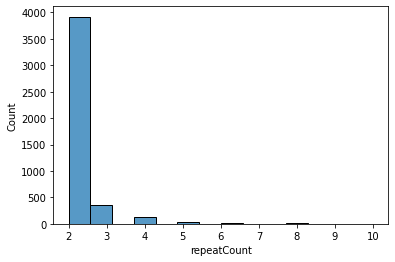

In [33]:
sns.histplot(x = df["repeatCount"])

In [34]:
df.repeatCount.skew()

4.947515422404222

In [35]:
df.repeatCount.value_counts()

2     3918
3      354
4      133
5       39
6       21
8        9
10       3
7        3
9        1
Name: repeatCount, dtype: int64

In [36]:
df.repeatCount.unique()

array([ 2,  3,  4,  5,  8,  6,  9, 10,  7])

In [37]:
df[df["repeatCount"] == 8].index.tolist()

[376, 1172, 3063, 4160, 4604, 4957, 6213, 6823, 9638]

In [38]:
index_pos=[]
for i in [7,8,9,10]:
    index = df[df["repeatCount"] == i].index.values.tolist()
    for j in index:
        index_pos.append(j)
    
# index_pos

In [39]:
df.drop(index_pos,inplace=True)
df[df["repeatCount"]==8]

,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal


In [40]:
df.repeatCount.value_counts()

2    3918
3     354
4     133
5      39
6      21
Name: repeatCount, dtype: int64

In [41]:
df['repeatCount'] = np.log1p(df['repeatCount'])

<AxesSubplot:xlabel='repeatCount', ylabel='Count'>

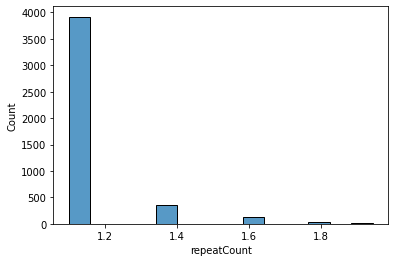

In [42]:
sns.histplot(x = df["repeatCount"])

In [43]:
df.head()

,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,1.098612,P3,60,Network,Wireless,Device Status,AP Down,True
1,1.098612,P0,60,Network,Firewall,Device Status,Device Down,True
2,1.098612,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,1.098612,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,1.098612,P0,59,Compute,Operating System,Device Status,Device Down,True


In [44]:
# df.healTime.value_counts()

In [45]:
df.head()

,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,1.098612,P3,60,Network,Wireless,Device Status,AP Down,True
1,1.098612,P0,60,Network,Firewall,Device Status,Device Down,True
2,1.098612,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,1.098612,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,1.098612,P0,59,Compute,Operating System,Device Status,Device Down,True


In [46]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# sns.boxplot(x = df['healTime'] )

<AxesSubplot:xlabel='healTime'>

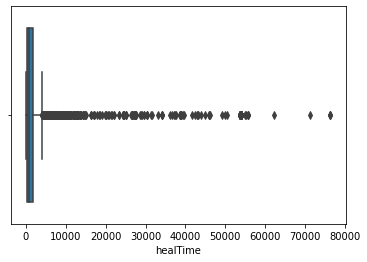

In [47]:
sns.boxplot(x = df['healTime'])

In [48]:
df.head()

,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,1.098612,P3,60,Network,Wireless,Device Status,AP Down,True
1,1.098612,P0,60,Network,Firewall,Device Status,Device Down,True
2,1.098612,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,1.098612,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,1.098612,P0,59,Compute,Operating System,Device Status,Device Down,True


In [49]:
# Splitting into features and value to be predicted
X = df.drop(columns=['alert_autoheal'])
y = df[['alert_autoheal']]

In [50]:
#Using SMOTE to balance the Data
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state = 2) 
# X, y = sm.fit_resample(X, y) 

# sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[1])
# ax[1].set_title("After Oversampling")
# ax[1].set_xlabel('Outcome')

# plt.tight_layout()
# plt.show()

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.27, random_state=2529)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3259, 7), (1206, 7), (3259, 1), (1206, 1))

In [52]:
X_train.head()

,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
8251,1.098612,P1,60,Others,Others,Others,Others
3936,1.386294,P1,23400,Others,Others,Others,Others
8642,1.098612,P2,6300,Compute,Operating System,Device Health,Memory
7585,1.098612,P0,7440,Compute,Operating System,Device Status,Device Down
2489,1.386294,P1,1380,Compute,Operating System,Device Status,Device Reboot


In [53]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [54]:
X_train[['priority']]= enc.fit_transform(X_train[['priority']])

In [55]:
X_test[['priority']] = enc.fit_transform(X_test[['priority']])

In [56]:
X_train.head()

,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
8251,1.098612,1.0,60,Others,Others,Others,Others
3936,1.386294,1.0,23400,Others,Others,Others,Others
8642,1.098612,2.0,6300,Compute,Operating System,Device Health,Memory
7585,1.098612,0.0,7440,Compute,Operating System,Device Status,Device Down
2489,1.386294,1.0,1380,Compute,Operating System,Device Status,Device Reboot


In [57]:
ohe = OneHotEncoder(drop='first',handle_unknown='ignore',sparse=False)
ohe.fit_transform(X_train[["alertClass","alertSubClass","alertCategory","alertSubCategory"]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [58]:
def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[["alertClass","alertSubClass","alertCategory","alertSubCategory"]]), columns=ohe.get_feature_names_out())
    df.drop(columns=["alertClass","alertSubClass","alertCategory","alertSubCategory"], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [59]:
X_train = get_ohe(X_train)
X_train.head()

,repeatCount,priority,healTime,alertClass_Compute,alertClass_Environment,alertClass_Network,alertClass_Others,alertSubClass_Operating System,alertSubClass_Others,alertSubClass_Power,...,alertSubCategory_Disk Utilization,alertSubCategory_Interface Down,alertSubCategory_Memory,alertSubCategory_Monitoring Failure,alertSubCategory_Opsramp Cloud Connectivity,alertSubCategory_Others,alertSubCategory_Temperature,alertSubCategory_Third Party Application Service,alertSubCategory_Webservice Performance,alertSubCategory_Website Down
0,1.098612,1.0,60,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.386294,1.0,23400,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.098612,2.0,6300,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.098612,0.0,7440,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.386294,1.0,1380,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
X_test = get_ohe(X_test)
X_test.head()

,repeatCount,priority,healTime,alertClass_Compute,alertClass_Environment,alertClass_Network,alertClass_Others,alertSubClass_Operating System,alertSubClass_Others,alertSubClass_Power,...,alertSubCategory_Disk Utilization,alertSubCategory_Interface Down,alertSubCategory_Memory,alertSubCategory_Monitoring Failure,alertSubCategory_Opsramp Cloud Connectivity,alertSubCategory_Others,alertSubCategory_Temperature,alertSubCategory_Third Party Application Service,alertSubCategory_Webservice Performance,alertSubCategory_Website Down
0,1.386294,2.0,2640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.098612,2.0,240,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.098612,1.0,900,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.098612,1.0,900,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.098612,2.0,240,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Lazy Predict: fit and evaluate all the models from scikit-learn with a single line of code

In [61]:
from lazypredict.Supervised import LazyClassifier

In [62]:
cls = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)

In [63]:
models, predictions = cls.fit(X_train, X_test, y_train, y_test)

 14%|██████                                      | 4/29 [00:00<00:03,  6.54it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 69%|█████████████████████████████▋             | 20/29 [00:02<00:01,  8.80it/s]

NuSVC model failed to execute
specified nu is infeasible


 93%|████████████████████████████████████████   | 27/29 [00:03<00:00,  9.60it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|███████████████████████████████████████████| 29/29 [00:03<00:00,  7.70it/s]


In [64]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               0.99     0.99      1.00   
ExtraTreesClassifier               0.99               0.98     0.98      0.99   
ExtraTreeClassifier                0.98               0.98     0.98      0.98   
LinearSVC                          0.98               0.96     0.96      0.98   
CalibratedClassifierCV             0.98               0.96     0.96      0.98   
PassiveAggressiveClassifier 

In [65]:
print(predictions)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
DecisionTreeClassifier             1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
BaggingClassifier                  1.00               1.00     1.00      1.00   
LGBMClassifier                     1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               0.99     0.99      1.00   
ExtraTreesClassifier               0.99               0.98     0.98      0.99   
ExtraTreeClassifier                0.98               0.98     0.98      0.98   
LinearSVC                          0.98               0.96     0.96      0.98   
CalibratedClassifierCV             0.98               0.96     0.96      0.98   
PassiveAggressiveClassifier 

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
classlr = LogisticRegression()

In [68]:
classlr.fit(X_train, y_train)

LogisticRegression()

In [69]:
# regression coefficients
print('Coefficients: ', classlr.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(classlr.score(X_test, y_test)))

Coefficients:  [[ 1.46237401e+00  7.61011390e+00 -6.31007043e-03  6.20942218e-01
   1.69465828e-01  1.26445263e+00  4.78891069e-01 -1.01387202e-01
   4.78891069e-01  1.69465828e-01  9.64747822e-01 -4.27879962e-01
   3.90509328e-01  7.22329420e-01 -2.96268133e-01  5.21704621e-01
   1.61948958e-01 -1.32872793e-01  1.65165862e+00  3.59243471e-01
   1.76831381e-01  4.78891069e-01 -4.30562198e-01  8.13218795e-02
  -1.10228186e-01  1.05416054e-01  1.76831381e-01  1.14995395e+00
   1.19916419e-01 -2.52789212e-01  4.78891069e-01  8.26850820e-01
   3.90509328e-01 -4.58217091e-01  1.61948958e-01]]
Variance score: 0.9867330016583747


In [70]:
score = classlr.score(X_train, y_train)

In [71]:
print(score)

0.9883399815894446


## Predict results

In [72]:
ypred = classlr.predict(X_test)

In [73]:
ypred

array([ True,  True,  True, ...,  True,  True,  True])

## Check Accuracy Score

In [74]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, ypred)))

Model accuracy score: 0.9867


## Confusion Matrix

In [75]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[251  13]
 [  3 939]]

True Positives(TP) =  251

True Negatives(TN) =  939

False Positives(FP) =  13

False Negatives(FN) =  3


<AxesSubplot:>

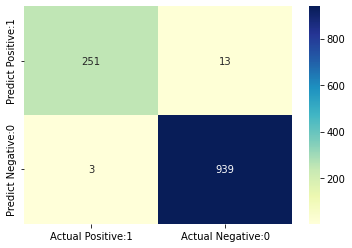

In [76]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Metrices
Classification Report¶
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

       False       0.99      0.95      0.97       264
        True       0.99      1.00      0.99       942

    accuracy                           0.99      1206
   macro avg       0.99      0.97      0.98      1206
weighted avg       0.99      0.99      0.99      1206



## Classification accuracy

In [79]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [80]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9867


## Classification error

In [81]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0133


## Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [82]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9508


## Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [83]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9882


## True Positive Rate
True Positive Rate is synonymous with Recall.

In [84]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9882


## False Positive Rate¶

In [85]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0137


## Specificity

In [86]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9863


## f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

##  ROC - AUC 
Table of Contents

ROC Curve
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP)

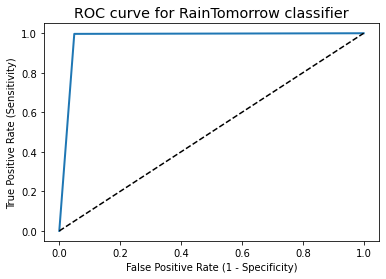

In [87]:
# plot ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, ypred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## ROC-AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [88]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, ypred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9738


## K - Fold Cross Validation

In [89]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(classlr, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.9892638  0.9892638  0.97239264 0.98773006 0.98771121]


In [90]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9853


##  Hyperparameter Optimization using GridSearch CV ¶


In [91]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = classlr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [92]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9859


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100)


In [93]:

# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9851
